# Cardiovascular Disease Prediction

##### Importing required libraries

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

import seaborn as sns
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import scipy.stats

import warnings
warnings.filterwarnings('ignore')

> - To split the available dataset for testing and training, we used the __train_test_split__ method from _sklearn.model_selection_ library. 
> - To scale the features, we used __StandardScaler__ method from _sklearn.preprocessing_ library.

For using the required ML algorithms, we use the following methods from _sklearn_ library:


| Sr No. | Algorithm | sub-library | method |
| --- | --- | --- | --- |
| 1. | Logistic Regression | linear_model | LogisticRegression |
| 2. | K Neighbors Classifier | neighbors | KNeighborsClassifier |
| 3. | Support Vector Classifier | svm | SVC |
| 4. | Decision Tree Classifier | tree | DecisionTreeClassifier |
| 5. | Random Forest Classifier | ensemble | RandomForestClassifier |

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

##### Importing the dataset

Since, all the libraries that are required were imported, next is to import the dataset and analyse the same. 

 ##### 1. Reading the dataset

In [4]:
dataset = pd.read_csv("C:\\Users\Julee\Downloads\heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


##### Checking for any missing values in the dataset

In [5]:
 dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### Getting info about the dataset

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The dataset has a total of 1025 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [7]:
categoryColumn = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuesColumn = ["age","trestbps","chol","thalach","oldpeak"]

Here we are normalizing only continues columns 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[continuesColumn] = scaler.fit_transform(dataset[continuesColumn]) #only normalize continus data 

In [9]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


##### 2. Data Visualisation and Extracting important features - (EDA)

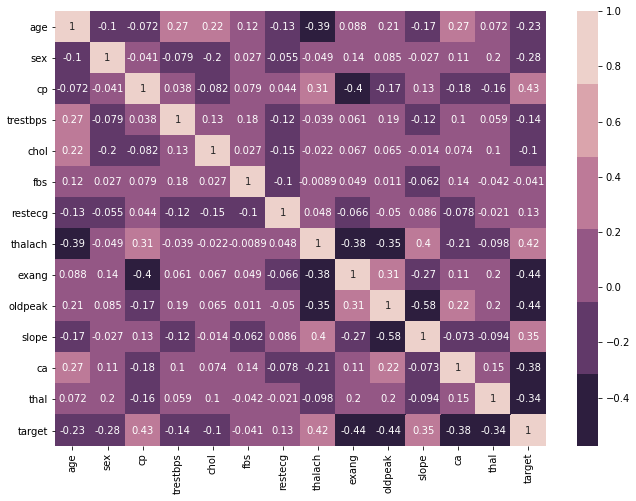

In [10]:
# Plotting Correlation matrix to get valuable insight into the data

numeric_col = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang','oldpeak','slope','ca', 'thal','target']
 
corr = dataset.loc[:,numeric_col].corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, 
            cmap = sns.cubehelix_palette(reverse=True), #as_cmap = True),
            xticklabels=corr.columns,
            yticklabels=corr.columns,annot=True);


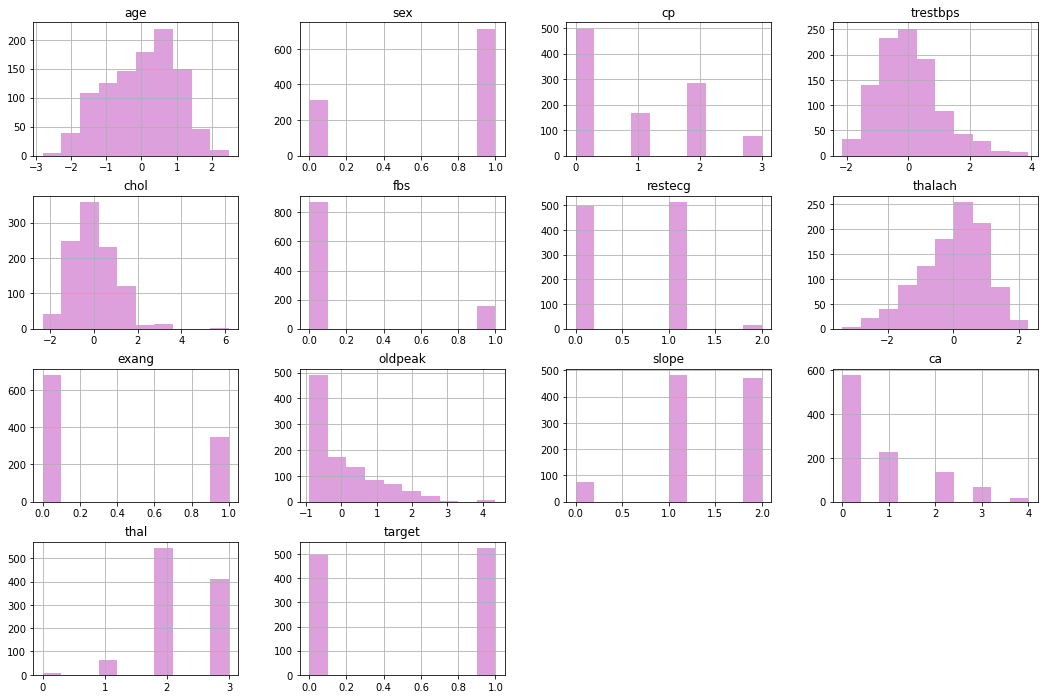

In [11]:
# Plotting histograms of each column to see the frequency of data values and analyse the same.

dataset.hist(figsize = (18,12), color ="plum");

Taking a look at the histograms above, we can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

In [12]:
x=dataset.drop(columns="target")
y=dataset["target"]

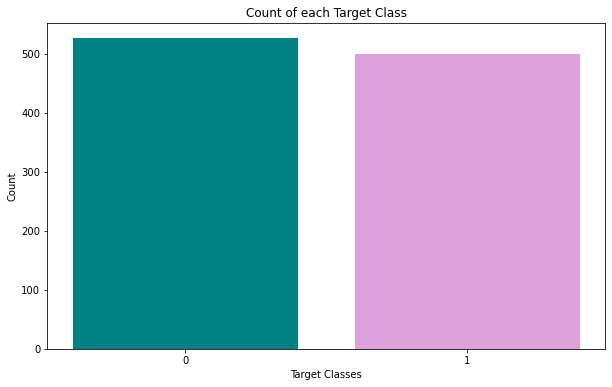

In [13]:
rcParams['figure.figsize'] = 10,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['teal', 'plum'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class');

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

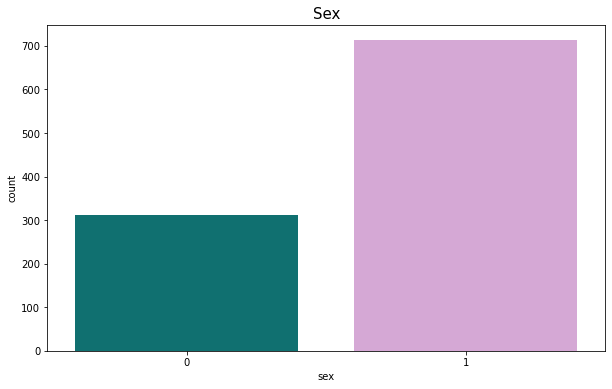

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(dataset["sex"],palette = ["teal","plum"])
plt.title("Sex", size=15)
plt.show()

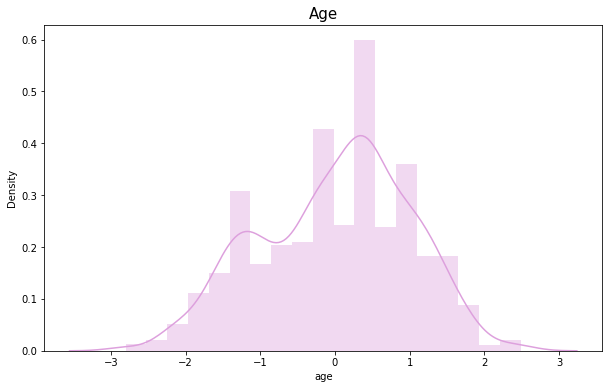

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(dataset["age"],color="plum")
plt.title("Age", size=15)
plt.show()

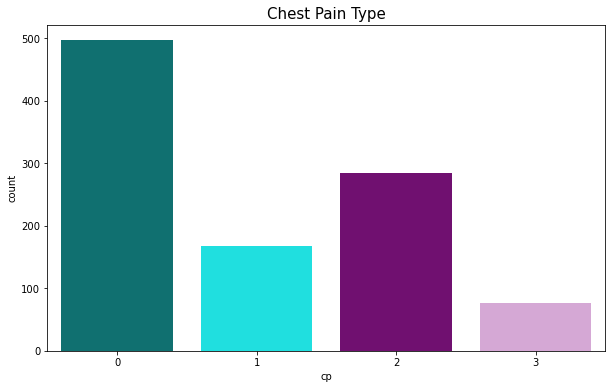

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(dataset["cp"],palette = ["teal","cyan","purple","plum"])
plt.title("Chest Pain Type", size=15)
plt.show()

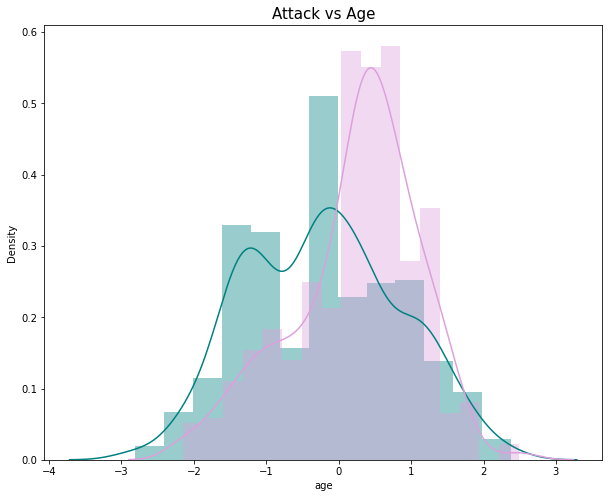

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[continuesColumn] = scaler.fit_transform(dataset[continuesColumn]) #only normalize continus data 

plt.figure(figsize=(10,8))
sns.distplot(dataset[dataset["target"]==1]["age"], color="teal")
sns.distplot(dataset[dataset["target"]==0]["age"], color="plum")
plt.title("Attack vs Age", size=15)
plt.show()

Now, we will use the StandardScaler from sklearn to scale dataset.

In [18]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


The data is not ready for our Machine Learning application.

In [19]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

### Machine Learning Algorithms

#### __Logistic Regression__

In [20]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

Accuracy of the model on is = 87.3%


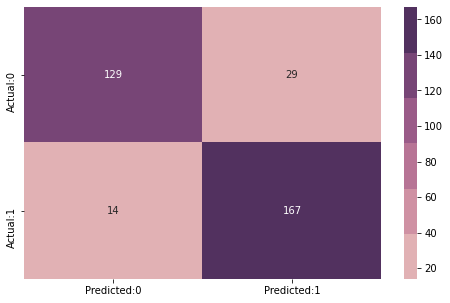

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       158
           1       0.85      0.92      0.89       181

    accuracy                           0.87       339
   macro avg       0.88      0.87      0.87       339
weighted avg       0.88      0.87      0.87       339



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

print('Accuracy of the model on is = {}%'.format(round(accuracy_score(y_test,y_pred),3)*100))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, 
            annot = True, 
            fmt = 'd', 
            cmap = sns.cubehelix_palette(dark=.25, light=.75));
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))



#### __K Neighbors Classifier__

The classification score varies based on different values of neighbors that we choose. Thus, plot a score graph for different values of K (neighbors) and check when do I achieve the best score.



In [22]:
knn_scores=[]
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

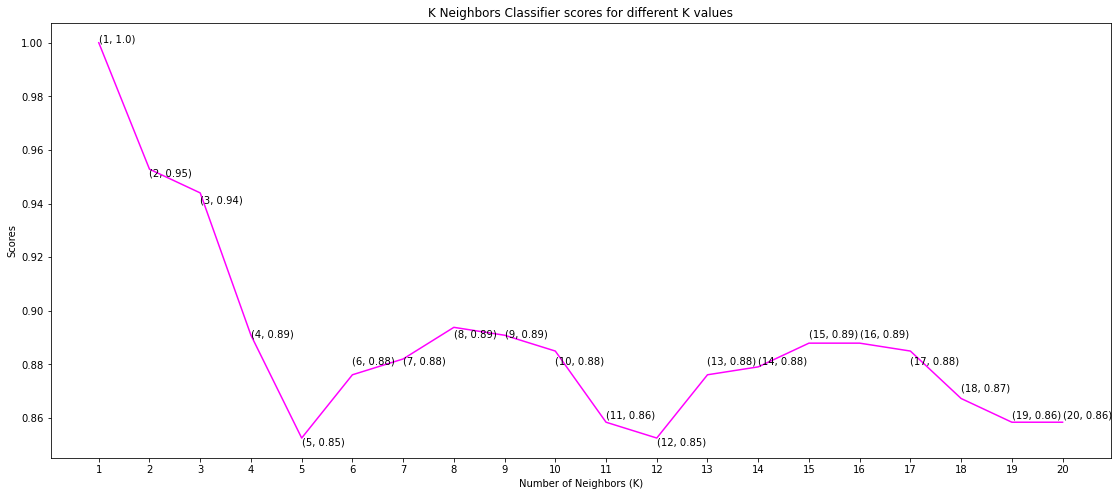

In [23]:
plt.figure(figsize=(19,8))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'magenta')

for i in range(1,21):
    plt.text(i, round(knn_scores[i-1],2), (i, round(knn_scores[i-1],2)))
 
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values');    

In [24]:
from numpy import mean

print("Average accuracy of KNN:",mean(knn_scores)*100,"%")

Average accuracy of KNN: 88.8938053097345 %


#### __Support Vector Machine__



In [25]:
svc_scores = []
kernels = ('linear','poly','rbf','sigmoid')
for i in range(len(kernels)):
    svc_classifier = SVC(kernel=kernels[i])
    svc_classifier.fit(X_train,y_train)
    svc_scores.append(svc_classifier.score(X_test,y_test))

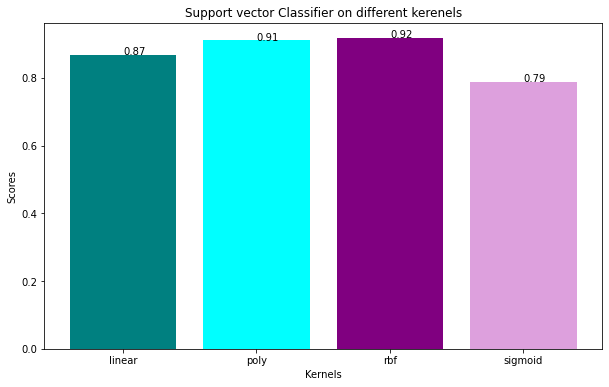

In [26]:
colors = rainbow(np.linspace(0,1,len(kernels)))
plt.bar(kernels,svc_scores, color = ["teal","cyan","purple","plum"])
for i in range(len(kernels)):
    plt.text(i,round(svc_scores[i],2),round(svc_scores[i],2))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support vector Classifier on different kerenels');

In [27]:
print('The score for Support Vector Classifier is {}% with {} kerenel.'
      .format(round((svc_scores[2]*100),2),'rbf'))

The score for Support Vector Classifier is 91.74% with rbf kerenel.


#### __Naive Bayes Algorithm__

In [28]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Gaussian NB accuracy:", score*100,"%")

new_row = {"Model": "GaussianNB", "Accuracy Score": score}

Gaussian NB accuracy: 84.36578171091446 %


#### __Decision Tree Classifier__

In [29]:
dt_scores = []
for i in range(1 , len(X.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state = 0)
    dt_classifier.fit(X_train,y_train)
    dt_scores.append(dt_classifier.score(X_test,y_test))
    

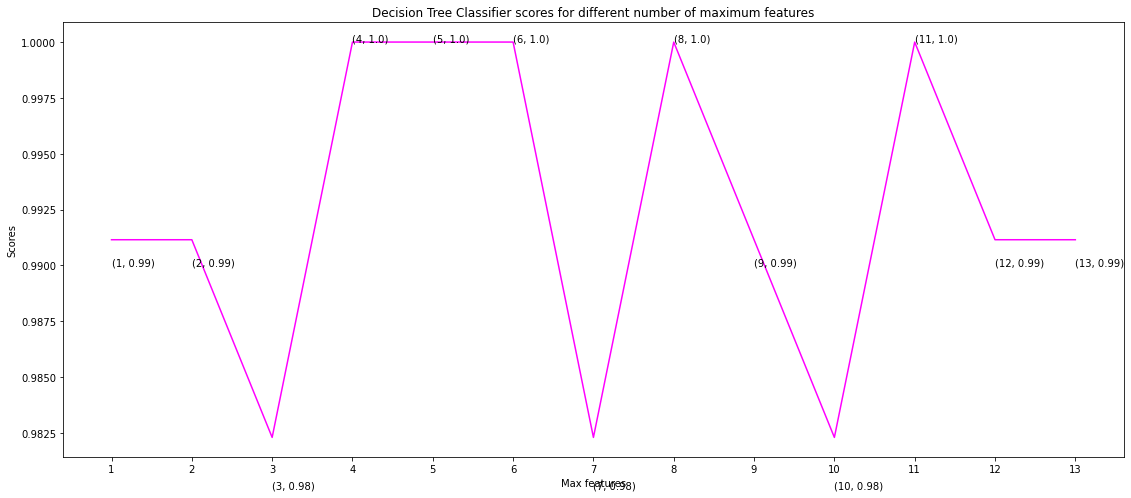

In [30]:
plt.figure(figsize=(19,8))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'magenta')
for i in range(1, len(X.columns) + 1):
    plt.text(i, round(dt_scores[i-1],2), (i, round(dt_scores[i-1],2)))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features');

In [31]:
print("Average accuracy of Decision Tree Classifier:",mean(dt_scores)*100,"%")

Average accuracy of Decision Tree Classifier: 99.25119128658952 %
